In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [ ]:
W_Data=pd.read_csv("/content/creditcard.csv")
W_Data.dropna(thresh=284315)
Data=W_Data[1:50000]

In [ ]:
Negatives=Data[Data['Class']==0]
Positives=Data[Data['Class']==1]

In [ ]:
#RBF Kernel
clf_AD = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf_AD.fit(Negatives)

OneClassSVM(gamma=0.1, nu=0.1)

In [ ]:
#Linear Kernel
clf_AD_L = svm.OneClassSVM(nu=0.1, kernel="linear", gamma=0.1)
clf_AD_L.fit(Negatives)

OneClassSVM(gamma=0.1, kernel='linear', nu=0.1)

In [ ]:
IFA=IsolationForest()
IFA.fit(Negatives)

IsolationForest()

In [ ]:
E_Train_Data=Data
E_Target=E_Train_Data['Class']
E_Train_Data.drop('Class',axis=1,inplace=True)
x_train_E,x_test_E,y_train_E,y_test_E=train_test_split(E_Train_Data,E_Target,test_size=0.5,random_state=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_AD_L=clf_AD_L.predict(Negatives)
test_AD_L=clf_AD_L.predict(Positives)

In [ ]:
train_IFA=IFA.predict(Negatives)
test_IFA=IFA.predict(Positives)

In [ ]:
train_AD=clf_AD.predict(Negatives)
test_AD=clf_AD.predict(Positives)

In [ ]:
def Train_Accuracy(Mat):
   
   Sum=0
   for i in Mat:
    
        if(i==1):
        
           Sum+=1.0
            
   return(Sum/len(Mat)*100)

def Test_Accuracy(Mat):
   
   Sum=0
   for i in Mat:
    
        if(i==-1):
        
           Sum+=1.0
            
   return(Sum/len(Mat)*100)

In [ ]:
print("Training: One Class SVM (RBF) : ",(Train_Accuracy(train_AD)),"%")
print("Test: One Class SVM (RBF) : ",(Test_Accuracy(test_AD)),"%")

In [ ]:
print("Training: Isolation Forest: ",(Train_Accuracy(train_IFA)),"%")
print("Test: Isolation Forest: ",(Test_Accuracy(test_IFA)),"%")

Training: Isolation Forest:  95.38926681783825 %
Test: Isolation Forest:  100.0 %


In [ ]:
print("Training: One Class SVM (Linear) : ",(Train_Accuracy(train_AD_L)),"%")
print("Test: One Class SVM (Linear) : ",(Test_Accuracy(test_AD_L)),"%")

In [ ]:
W_Data=pd.read_csv("/content/creditcard.csv")
W_Data.dropna(thresh=284315)
Data=W_Data
Positives_E=W_Data[W_Data['Class']==1]
Negatives_E=W_Data[W_Data['Class']==0]

In [ ]:
IFA=IsolationForest()
IFA.fit(Negatives_E)
train_IFA=IFA.predict(Negatives)
test_IFA=IFA.predict(Positives)

In [ ]:
print("Training: Isolation Forest: ",(Train_Accuracy(train_IFA)),"%")
print("Test: Isolation Forest: ",(Test_Accuracy(test_IFA)),"%")

Training: Isolation Forest:  96.64902998236332 %
Test: Isolation Forest:  50.0 %


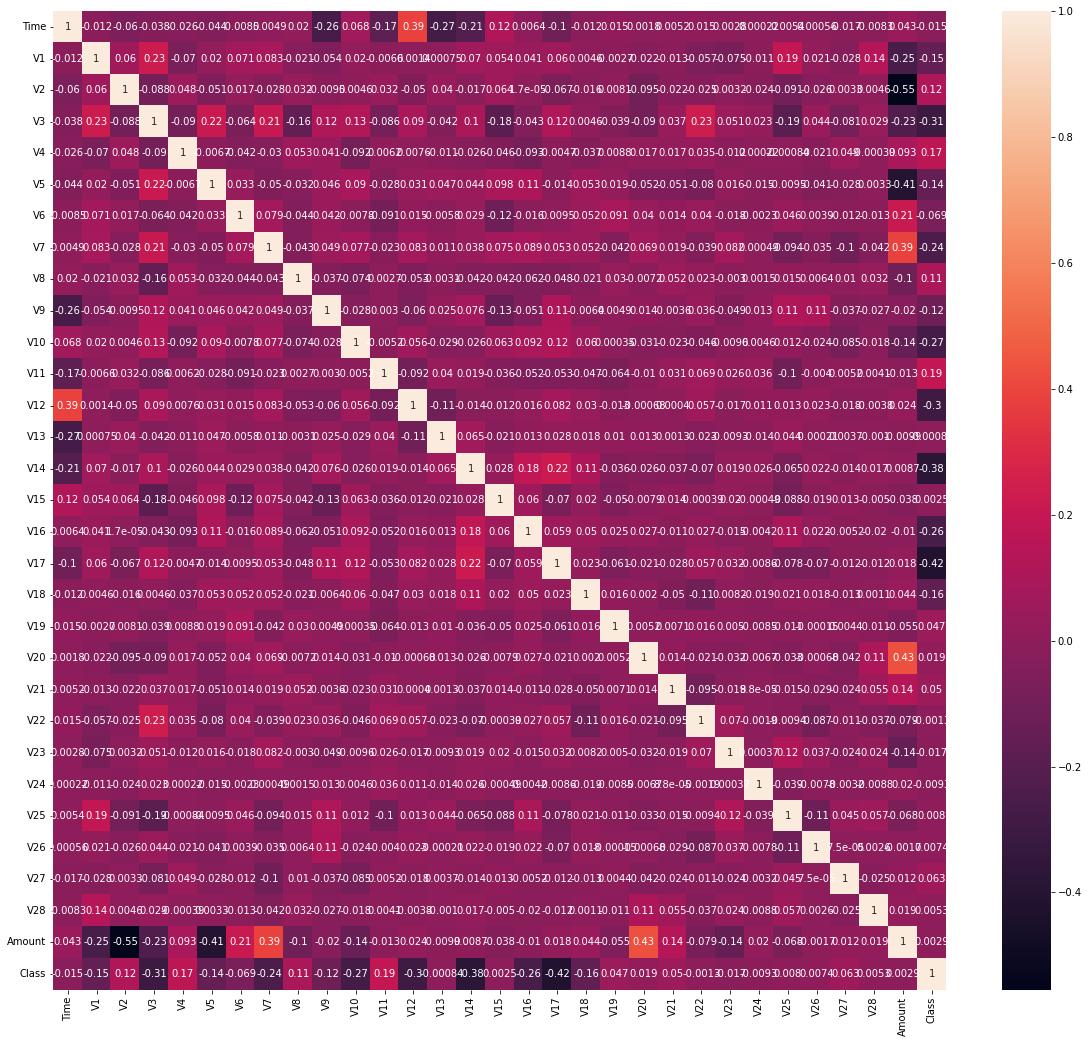

In [ ]:
plt.figure(figsize=(20,18))
Corr=Data[Data.columns].corr()
sns.heatmap(Corr,annot=True)